# Do people resign due to unsatisfaction? - Analysis of exit surveys for two australian institutes

`Category: data cleaning and exploratory data analysis`

In this project, we're going to analyse two datasets containing exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

The TAFE dataset can be downloaded [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the DETE dataset [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/distribution/dist-qld-95db4f3d-9857-4666-b82b-bd09aaf6dd70/details?q=exit%20survey).

Our project aims at analysing **the incidence of dissatisfaction as a factor for resigning** for:
* Employees in different career stages
* Employees of different age
* Female and male employees
* DETE and TEFE analysed separately

In short, our exploratory analysis has shown that:
* More experienced workers, older employees (56 or orlder) and men tend to resign more due to dissatisfaction
* The incidence of dissatisfaction is much higher in DETE than in TAFE 

*[From the learning point of view, the aim of the project is to practice with cleaning techniques (handling missing values, combining datasets, transforming the content of columns) and with exploratory techniques (pivot tables, quick charts)]* 

In [1]:
# importing the two main python packages for data analysis
import numpy as np
import pandas as pd

In [2]:
# read the datasets into dataframes
dete_survey = pd.read_csv('datasets/dete_exit_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('datasets/tafe_exit_survey.csv')

For the DETE dataset, we noticed that some null values are reported as 'Not Stated'. Therefore, we reloaded the dataset with the parameter na_values which maps them to NaN.

## Preview of the datasets

In [3]:
dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,No,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


We see that the DETE dataset has 822 records and 56 colums, the TAFE dataset has 702 records and 72 columns.
Both institutes used the same template for the exit survey, but TAFE customized it. As a result, we have different columns in the two datasets and we have to take it into account for when we'll combine the data.<br />
Unfortunately we don't have any explanatory file at our disposal, so we'll have to infer the meaning of the columns by ourselves.

We'll start the cleaning by **dropping columns which are considered useless for our analysis**. Let's see the details of each column.

## Cleaning phase

In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

The columns from 28 to 48 detail the work experience of the employee. We won't use these columns as a measure of unsatisfaction, because columns 10 to 27 are easier to use for our purpose and also they don't have missing values.

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

The columns of the TAFE dataset are less easy to read. We decided to use the columns which refer to the 'Contributing Factors' (*to resignment*, we understand). They are the equivalent of the columns chosen for the DETE. In this case, though, there are lots of missing values (265 out of 702 records).

So we're ready to drop the columns:

In [7]:
# drop useless columns
dete_survey_updated = dete_survey.drop(labels=dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(labels=tafe_survey.columns[17:66], axis=1)

We now change the name of some of the columns in the TAFE dataset so that they start to look like the ones in DETE.

In [8]:
columns_name_dict = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
                    'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 
                    'Employment Type. Employment Type': 'employment_status', 
                    'Classification. Classification': 'classification',
                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(columns_name_dict, axis=1, inplace=True)        

We continue the cleaning by reducing the column names to the same format, to improve readability.

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

The remaining columns are therefore:

In [10]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none', 'gender',
       'age', 'employment_status', 'classification', 'institute_service',
       'role_service'],
      dtype='object')

Now, we know we're interested in the analysis of employees who resigned, so we select them by the column `separationtype`.

In [12]:
# preview of the column
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

There are three categories of separation type which refer to Resignation. We'll select them.

In [13]:
# selecting employees who resigned in DETE
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

In [14]:
# now DETE has 311 records
dete_resignations.shape[0]

311

We do the same for TAFE.

In [15]:
# preview of separation type column
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [16]:
# selecting employees who resigned in TAFE
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)].copy()

In [17]:
# now TAFE has 340 records
tafe_resignations.shape[0]

340

Now, both datasets contain information about how long an employee has been working at the corresponding institute (i.e. years of service).<br />
This information is already available in TAFE dataset:

In [18]:
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

Insted, the DETE dataset has two columns from which this information has to be calculated, i.e. `cease_date` and `dete_start_date`.

In [19]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

By inspection, we see there are no outliers, but the data are not all in the same format. We'll now clean the column.

In [20]:
# extract the years and discard the months
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'(20[0-9]{2})')

# convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

The column is now cleaner (there are still missing values):

In [21]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
NaN        11
Name: cease_date, dtype: int64

Let's check the values of the start date column with a boxplot.

<AxesSubplot:>

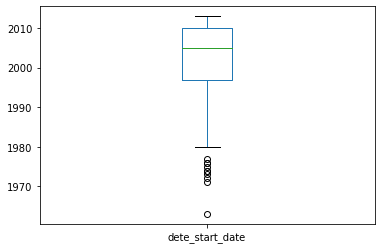

In [22]:
dete_resignations['dete_start_date'].plot(kind='box')

There are no apparent outliers.

We'll now do a consistency check of the values of the two columns: of course, the cease date cannot be smaller than the start date.

In [23]:
# check that cease_date >= dete_start_date
(dete_resignations['cease_date'] < dete_resignations['dete_start_date']).sum()

0

The dates are all consistent; we can therefore create an `institute_service` column containing the years of service also for the DETE dataset.

In [24]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

There are still missing values, but we'll handle them later, just before analysis.

We also quickly check the `cease_date` column for the TAFE dataset:

In [25]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64

There are no outliers.

Now we need to perform a last step of transformation, before we can combine the two datasets. We need a **boolean column which contains True for employees who resigned due to unsatisfaction, and False otherwise**.

For the DETE dataset, we will use the boolean columns in the following list, which express the factors which led to resignment:

In [26]:
cols_dissatisfied = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'work_life_balance', 'workload']

We will consider unsatisfied an employee for whom at least one of the previous column contains True.

In [27]:
# create the 'dissatisfied' boolean column
dete_resignations['dissatisfied'] = dete_resignations[cols_dissatisfied].any(axis=1, skipna=False)

# use the copy() function to avoid SetWithCopy warning
dete_resignations_up = dete_resignations.copy()

We now do a similar work on the TAFE dataset. There are two columns of the Contributing Factors which are clearly a measure of unsatisfaction.

In [28]:
tafe_resignations['contributing_factors._dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing_factors._dissatisfaction, dtype: int64

In [29]:
tafe_resignations['contributing_factors._job_dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: contributing_factors._job_dissatisfaction, dtype: int64

Again, we will consider unsatisfied an employee who checked one or both of the previous factors. We create the `dissatisfied` column in the following cell.

In [30]:
# function which translates the values into True/False/NaN
def update_values(reason):
    if pd.isnull(reason):
        return np.nan
    elif reason == '-':
        return False
    else:
        return True

# apply the function above to the columns, so they become boolean    
tafe_resignations[['contributing_factors._dissatisfaction', 'contributing_factors._job_dissatisfaction']] = \
tafe_resignations[['contributing_factors._dissatisfaction', 'contributing_factors._job_dissatisfaction']].applymap(update_values)

# create the 'dissatisfied' column in the TAFE dataset
tafe_resignations['dissatisfied'] = tafe_resignations[['contributing_factors._dissatisfaction', 'contributing_factors._job_dissatisfaction']].any(axis=1, skipna=False)

# avoid SetWithCopy warning
tafe_resignations_up = tafe_resignations.copy()

We note there are missing values in the just created column.

In [31]:
tafe_resignations_up['dissatisfied'].isnull().sum()

8

To sum up, this is how the two datasets look like now:

In [32]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


In [33]:
tafe_resignations_up.head()

,id,institute,workarea,cease_date,separationtype,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,...,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender,age,employment_status,classification,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


## Combining the two datasets

We're now ready to combine the two datasets, but before we create an `institute` column so that we can still retrieve the two institutes.

In [34]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# combine the two datasets with concat()
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [35]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             308 non-null    object 
 6   classification                                       451 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

The resulting dataset, `combined`, has 651 entries. We'll now drop the columns with less than 500 non-null values, as a further cleaning step.

In [36]:
combined_updated = combined.dropna(axis='columns', thresh=500).copy()

The resulting dataframe is much lighter now.

In [37]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   employment_status  597 non-null    object 
 4   gender             592 non-null    object 
 5   age                596 non-null    object 
 6   institute_service  563 non-null    object 
 7   dissatisfied       643 non-null    object 
 8   institute          651 non-null    object 
dtypes: float64(2), object(7)
memory usage: 45.9+ KB


Let's drop the 8 rows with missing values for `dissatisfied`.

In [38]:
combined_updated = combined_updated[~combined_updated['dissatisfied'].isnull()].copy()

This is the dataframe we'll work with in the analysis. As we can see, there are still lots of missing values. As anticipated, we'll perform the rest of the cleaning during the analysis phase.

## Exploratory data analysis

A good way to have **a bird-eye view of missing values is using the heatmap of seaborn**, which maps numerical values to different nuances of colors. In our case, False is 0 and True is 1, so we'll have a two-colors heatmap (beige for True: missing value and black for False: non-null value).

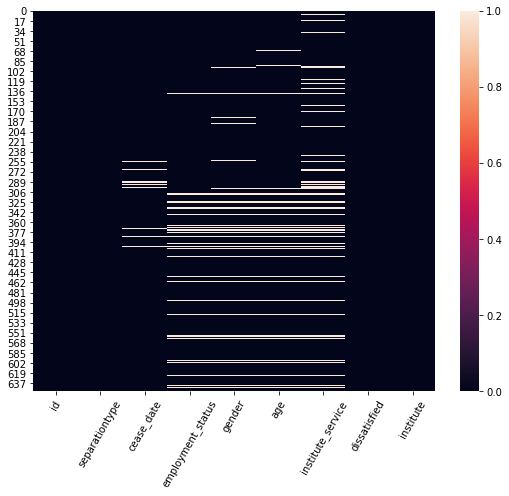

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))

sns.heatmap(combined_updated.isnull())

plt.xticks(rotation=60)
plt.show()

From the heatmap, we observe that the columns we'll use for the following analysis (`gender`, `age`, `insitute_service`) have a good fraction of the missing values in common.<br />
Furthermore, the missing values are mainly in the TAFE dataset (the lower part of the combined dataframe).

Let's start our analysis and perform the remaining cleaning.

### Career stage analysis

Our first question is: **are employees who resign in later career stages more unsatisfied?**

Let's start with the cleaning of the column `institute_service`.

In [40]:
# convert to string so that we have uniform data type
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
combined_updated['institute_service'].unique()

array(['7.0', '18.0', '3.0', '15.0', '14.0', '5.0', 'nan', '30.0', '32.0',
       '39.0', '17.0', '9.0', '6.0', '1.0', '35.0', '38.0', '36.0',
       '19.0', '4.0', '26.0', '10.0', '8.0', '2.0', '0.0', '23.0', '13.0',
       '16.0', '12.0', '21.0', '20.0', '24.0', '33.0', '22.0', '28.0',
       '49.0', '11.0', '41.0', '27.0', '42.0', '25.0', '29.0', '34.0',
       '31.0', '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

As a consequence of the combination of the two datasets, we have both actual years and intervals. We want to map these values/intervals into categories which represent the career stage of an employee when he resigned.<br />
These categories will consitute the new column `service_cat` for "years of service category".

In [41]:
# preliminar cleaning of two categories: transforming in years
combined_updated['institute_service'].replace('Less than 1 year', '1.0', inplace=True)
combined_updated['institute_service'].replace('More than 20 years', '20.0', inplace=True)

# extract the lower bound from intervals and convert to float type
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'([0-9]+)[.-]')
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

# function which will map years of service in experience category
def categorize(years):
    if pd.isnull(years):
        return np.nan
    
    if years < 3:
        return 'New'
    elif 3 <= years <= 6:
        return 'Experienced'
    elif 7 <= years <= 10:
        return 'Established'
    elif years >= 11:
        return 'Veteran'

# creating the new column service_cat from cleaned institute_service    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)

# converting to categorical
combined_updated['service_cat'] = pd.Categorical(combined_updated['service_cat'],
                                                 ordered=True,
                                                 categories=['New', 'Experienced', 'Established', 'Veteran'])

There are still 80 missing values. We'll leave them unchanged, ignoring them during the analysis of this column. This is because there's no one category really dominating over the other. Another possibility is to substitute them with the value 'Unknown'.

*(discalimer: actually i've ruminated a lot on what to do with these missing values and still couldn't come up with a really convincing idea; what I do with missing data in this project is mostly showing some of the possibilities as a future review)*

In [42]:
# missing values
combined_updated['service_cat'].isnull().sum()

80

Let's now build a pivot table with the percentages of employees resigning for dissatisfaction, for the different career stages.

In [43]:
# casto to boolean type (it was still object due to Nan's)
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].astype('bool')

dissatisf_career = combined_updated.pivot_table(values='dissatisfied', index='service_cat', aggfunc=np.mean).round(3) * 100
dissatisf_career

,dissatisfied
service_cat,
New,29.5
Experienced,34.3
Established,51.6
Veteran,48.5


We use a bar plot to visualize the results:

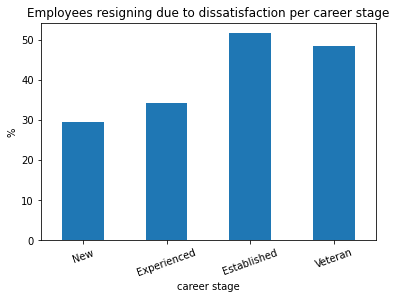

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

dissatisf_career.plot(kind='bar', legend=False)
plt.title('Employees resigning due to dissatisfaction per career stage')
plt.ylabel('%')
plt.xlabel('career stage')
plt.xticks(rotation=20)

plt.show()

We observe that **more than 50% of Established (7-10 years of service) and slightly less than 50% of Veterans (more than 10 years of service) employees resign due to some kind of dissatisfaction**. The incidence of dissatisfaction among younger categories is around 30%.

These facts should be taken under exams; perhaps employees tend to be treated better in the early stages of their careers at TAFE/DETE while afterwards they are overloaded with responsibilities and/or not listened to properly.<br />
Let's see if this evidence find confirmation by performing the same kind of analysis by age groups.

### Age group analysis

The question we're interested in is: **Are older employees who resign more unsatisfied?**<br />
First, we have to clean the `age` column. Let's look at its values. 

In [45]:
combined_updated['age'].unique()

array(['36-40', '41-45', '31-35', '46-50', '61 or older', '56-60',
       '51-55', '21-25', '26-30', nan, '20 or younger', '41  45',
       '56 or older', '46  50', '36  40', '21  25', '31  35', '26  30'],
      dtype=object)

The age is represented as intervals. We can see some of them have double spaces instead of dash, and that most intervals comprise five years, while we need wider intervals for age group analysis. Therefore, we will map these values in broader categories of employee age.<br />
Let's clean the column keeping these observations in mind.

In [46]:
# putting all values in the same format
combined_updated['age'] = combined_updated['age'].str.replace('  ', '-').str.replace(' or older', '-').str.replace(' or younger', '-')

#### generating a new age_group column ####

# starting by extracting the lower bound from the intervals and converting the column to float
combined_updated['age_group'] = combined_updated['age'].str.extract(r'([0-9]{2})-').astype('float')

# function for classification according to age group
def age_groups(age):
    if pd.isnull(age):
        return np.nan
    
    if age <= 30:
        return '30 or younger'
    elif 31 <= age <= 40:
        return '31 - 40'
    elif 41 <= age <= 55:
        return '41 - 55'
    else:
        return '56 or older'
    
# applying the function to age_group column 
combined_updated['age_group'] = combined_updated['age_group'].apply(age_groups)

# converting to categorical
combined_updated['age_group'] = pd.Categorical(combined_updated['age_group'],
                                               ordered=True,
                                               categories=['30 or younger', '31 - 40', '41 - 55', '56 or older'])

The `age` column, and as a consequence the `age_group` column, still contains 47 missing values:

In [47]:
combined_updated['age'].isnull().sum()

47

By considering the histogram of the age groups, we can see that **41-55 years old** is the most populated category...

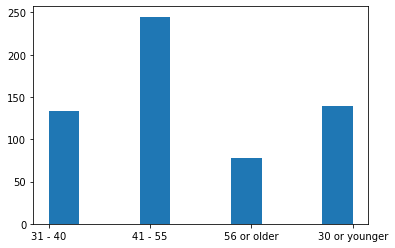

In [48]:
combined_updated['age_group'].hist(grid=False)
plt.show()

...for this reason, we will use this category to fill missing values. This is one possible approach when dealing with missing values in categorical columns. 

*(disclaimer: actually i've ruminated a lot on what to do with these missing values and still couldn't come up with a really convincing idea; what I do with missing data in this project is mostly showing some of the possibilities as a future review)*

In [49]:
combined_updated['age_group'] = combined_updated['age_group'].fillna('41 - 55')

We're now ready to aggregate data and answer our question.

In [50]:
dissatisf_age = combined_updated.pivot_table(index='age_group', values='dissatisfied', aggfunc=np.mean).round(3) * 100
dissatisf_age                                    

,dissatisfied
age_group,
30 or younger,35.3
31 - 40,35.8
41 - 55,37.7
56 or older,42.3


We represent our results with a bar plot.

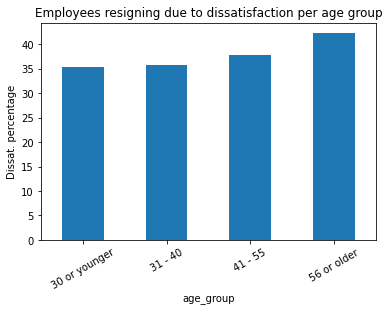

In [51]:
dissatisf_age.plot(kind='bar', legend=False)
plt.xticks(rotation=30)
plt.ylabel('Dissat. percentage')
plt.title('Employees resigning due to dissatisfaction per age group')

plt.show()

From the bar plot above, we see that the **oldest employees (older than 55) who resign are more dissatisfied with their job/department with respect to younger employees**. This observation is consistent with what we saw in the previous paragraph, where we concluded that Experienced/Veteran employees tend to resign more due to unsatisfaction. In that case, though, the differences were more noticeable.

### Gender analysis

Let's try to see what the incidence of dissatisfaction is among women and men who resign.<br />
We'll clean the column `gender` before, by replacing nans with the most frequent value (Female).  

In [52]:
combined_updated['gender'].value_counts(dropna=False)

Female    424
Male      168
NaN        51
Name: gender, dtype: int64

In [53]:
combined_updated['gender'] = combined_updated['gender'].replace(np.nan, 'Female')

Let's visualize the incidence of dissatisfaction with a bar plot.

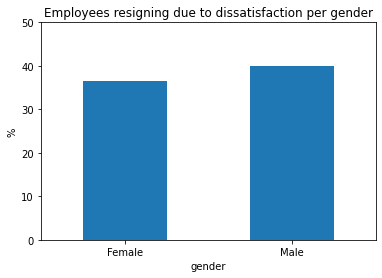

In [54]:
dissatisf_gender = combined_updated.pivot_table(index='gender', values='dissatisfied') * 100

dissatisf_gender.plot(kind='bar', legend=False)
plt.xticks(rotation=0)
plt.ylabel('%')
plt.ylim((0,50))
plt.title('Employees resigning due to dissatisfaction per gender')

plt.show()

We see that men are sligthly more dissatisfied (~ 40%) than women (~ 37%) when they resign.

### A look at the two institutes separately

Before we end this project, we want to briefly analyse the two datasets separately.<br />
**Do employees from one of the two institutes resign due to dissatisfaction more than the other?**

In [55]:
# grouping by institute and calculating the percentage of dissatisfied who resigned
combined_updated.groupby('institute')['dissatisfied'].mean().round(3) * 100

institute
DETE    47.9
TAFE    27.4
Name: dissatisfied, dtype: float64

The result is clear: **almost half of employees from DETE resigned due to some form of dissatisfaction**, while the incidence is less than 30% for TAFE emplooyees. 

Considering this result, we may ask ourself what the situation is with respect to career stages, in the two institutes (recall that we found the greatest differences in the `Career stage analysis` paragraph).

In [56]:
combined_updated.groupby(['institute', 'service_cat'])['dissatisfied'].mean().round(3) * 100

institute  service_cat
DETE       New            37.5
           Experienced    46.1
           Established    61.0
           Veteran        56.0
TAFE       New            26.3
           Experienced    25.0
           Established    33.3
           Veteran        27.8
Name: dissatisfied, dtype: float64

The results cannot be easily understood this way. We'll build a categorical plot with seaborn.

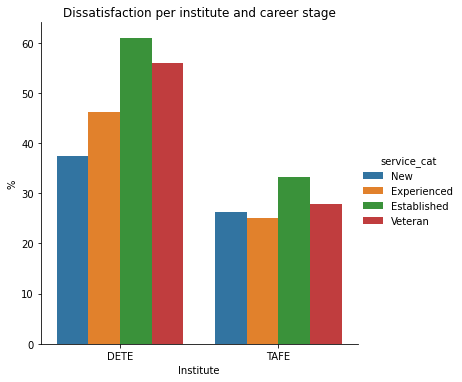

In [57]:
# convert the previous series to dataframe
dissat_inst_career = (combined_updated.groupby(['institute', 'service_cat'])['dissatisfied'].mean().round(3) * 100).to_frame()

# reset index because seaborn requires data organised in columns
dissat_inst_career = dissat_inst_career.reset_index()

# building the plot
sns.catplot(x='institute',
            y='dissatisfied',
            hue='service_cat',
            data=dissat_inst_career,
            kind='bar')

plt.title('Dissatisfaction per institute and career stage')
plt.ylabel('%')
plt.xlabel('Institute')
plt.show()

The Experienced and Veterans are the most dissatisfied categories in both institutes, but the difference with New/Experienced employees is most pronounced in DETE than in TAFE.<br />
**We can conclude that dissatisfaction is a much more important factor in DETE than in TAFE, and that its incidence is particularly high in more experienced employees (56-62% vs 37-46%)**. Older employees in DETE are the people whose needs should be analysed/adressed first. 

## Conclusion

In this project, we have analysed exit survey data from two australian institutions. We have **cleaned the datasets,  combined them, and performed some exploratory analysis by aggregating data** by career stage, gender and age. Our interest has been focused on dissatisfaction as a main factor for resigning.

Our conclusions are:
* DETE employees tend to resign more (48%) due some kind of dissatisfaction than TAFE employees (27%)
* Cosidering the combined datasets:
    * About half of employees with 7 or more years of service tend to resign due to dissatisfaction. Incidence is much lower for employees in earlier career stages (30 to 35%).
    * The incidence of resignment for dissatisfaction is higher in employees older than 55: about 42%.
    * Incidence for men is higher than for women: ~40% vs ~36%

This exploratory analysis should of course be deepened by analysing all the factors leading to unsatisfaction. The columns we dropped at the beginning of the cleaning phase contain the perception of the working experience for each employee and would surely make a good starting point.